In [1]:
!pip install python-doctr
!pip install "python-doctr[tf]"
!pip install "python-doctr[torch]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
model = ocr_predictor(det_arch = 'db_resnet50',    
                      reco_arch = 'crnn_vgg16_bn', 
                      pretrained = True
                     )

  0%|          | 0/94178964 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [3]:
img_path = "/content/modele-facture-fr-classique-blanc-750px.png" #Specify your image path here
img = DocumentFile.from_images(img_path)
result = model(img)
output = result.export()

In [4]:
for out in output['pages'][0]['blocks']:
  for geo in out['lines']:
    for word in geo['words']:
      print(word['geometry'],'  :   ',word['value'])

    
    
      

((0.0712890625, 0.0673828125), (0.16796875, 0.0849609375))   :    Joanna
((0.1748046875, 0.0673828125), (0.244140625, 0.0849609375))   :    Binet
((0.0693359375, 0.10546875), (0.095703125, 0.12109375))   :    48
((0.095703125, 0.1083984375), (0.1708984375, 0.119140625))   :    Coubertin
((0.072265625, 0.125), (0.12109375, 0.13671875))   :    31400
((0.123046875, 0.123046875), (0.1650390625, 0.1376953125))   :    Paris
((0.7998046875, 0.068359375), (0.9267578125, 0.0830078125))   :    FACTURE
((0.072265625, 0.228515625), (0.134765625, 0.240234375))   :    Facturé
((0.1357421875, 0.2275390625), (0.150390625, 0.2421875))   :    à
((0.0712890625, 0.248046875), (0.150390625, 0.26171875))   :    Cendrillon
((0.1513671875, 0.248046875), (0.189453125, 0.263671875))   :    Ayot
((0.0703125, 0.2646484375), (0.095703125, 0.2802734375))   :    69
((0.09375, 0.2666015625), (0.123046875, 0.2783203125))   :    rue
((0.1240234375, 0.2666015625), (0.18359375, 0.27734375))   :    Nations
((0.072265625, 

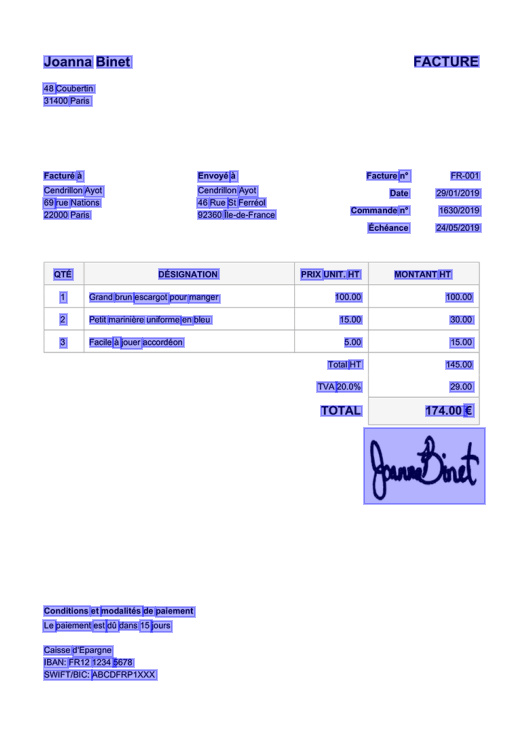

In [5]:
result.show(img)

In [6]:
result

Document(
  (pages): [Page(
    dimensions=(1061, 750)
    (blocks): [
      Block(
        (lines): [
          Line(
            (words): [
              Word(value='Joanna', confidence=1.0),
              Word(value='Binet', confidence=0.99),
            ]
          ),
          Line(
            (words): [
              Word(value='48', confidence=0.84),
              Word(value='Coubertin', confidence=0.56),
            ]
          ),
          Line(
            (words): [
              Word(value='31400', confidence=1.0),
              Word(value='Paris', confidence=1.0),
            ]
          ),
        ]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='FACTURE', confidence=0.91)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [
          Line(
            (words): [
              Word(value='Facturé', confidence=0.98),
              Word(value='à', confidence=1.0),
            ]
          ),
     

In [7]:
import math
def convert_coordinates(geometry, page_dim):
    len_x = page_dim[1]
    len_y = page_dim[0]
    (x_min, y_min) = geometry[0]
    (x_max, y_max) = geometry[1]
    x_min = math.floor(x_min * len_x)
    x_max = math.ceil(x_max * len_x)
    y_min = math.floor(y_min * len_y)
    y_max = math.ceil(y_max * len_y)
    return [x_min, x_max, y_min, y_max]
def get_coordinates(output):
    page_dim = output['pages'][0]["dimensions"]
    text_coordinates = []
    for obj1 in output['pages'][0]["blocks"]:
        for obj2 in obj1["lines"]:
            for obj3 in obj2["words"]:                
                converted_coordinates = convert_coordinates(
                                           obj3["geometry"],page_dim
                                          )
                print("{}: {}".format(converted_coordinates,
                                      obj3["value"]
                                      )
                     )
                text_coordinates.append(converted_coordinates)
    return text_coordinates

In [8]:
graphical_coordinates = get_coordinates(output)

[53, 126, 71, 91]: Joanna
[131, 184, 71, 91]: Binet
[52, 72, 111, 129]: 48
[71, 129, 115, 127]: Coubertin
[54, 91, 132, 146]: 31400
[92, 124, 130, 147]: Paris
[599, 696, 72, 89]: FACTURE
[54, 102, 242, 255]: Facturé
[101, 113, 241, 257]: à
[53, 113, 263, 278]: Cendrillon
[113, 143, 263, 280]: Ayot
[52, 72, 280, 298]: 69
[70, 93, 282, 296]: rue
[93, 138, 282, 295]: Nations
[54, 91, 300, 313]: 22000
[93, 124, 300, 313]: Paris
[280, 328, 242, 258]: Envoyé
[328, 340, 241, 257]: à
[280, 340, 263, 278]: Cendrillon
[340, 370, 263, 280]: Ayot
[279, 298, 281, 296]: 46
[298, 325, 280, 297]: Rue
[324, 340, 281, 296]: St
[340, 382, 281, 295]: Ferréol
[280, 318, 300, 313]: 92360
[319, 397, 298, 313]: ile-de-France
[529, 577, 242, 255]: Facture
[576, 594, 240, 257]: no
[563, 593, 268, 281]: Date
[506, 576, 294, 306]: Commande
[577, 594, 293, 307]: no
[531, 594, 318, 333]: Echéance
[654, 696, 242, 255]: FR-001
[632, 698, 267, 282]: 29/01/2019
[636, 698, 293, 308]: 1630/2019
[632, 698, 320, 332]: 24/0

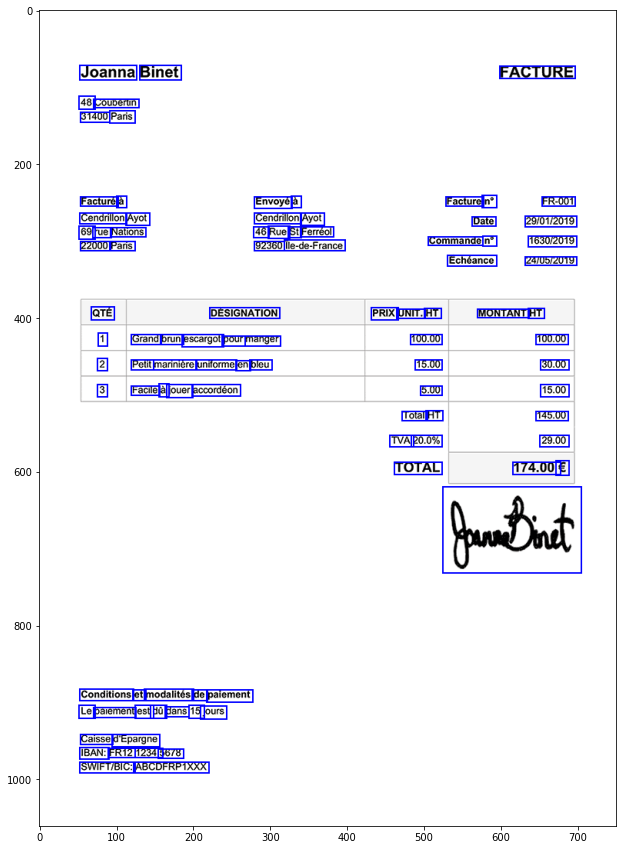

In [9]:
import PIL
from PIL import ImageDraw
import matplotlib.pyplot as plt
def draw_bounds(image, bound):
    draw = ImageDraw.Draw(image)
    for b in bound:
        p0, p1, p2, p3 = [b[0],b[2]], [b[1],b[2]], \
                         [b[1],b[3]], [b[0],b[3]]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill='blue', width=2)
    return image
image = PIL.Image.open(img_path)
result_image = draw_bounds(image, graphical_coordinates)
plt.figure(figsize=(15,15))
plt.imshow(result_image)

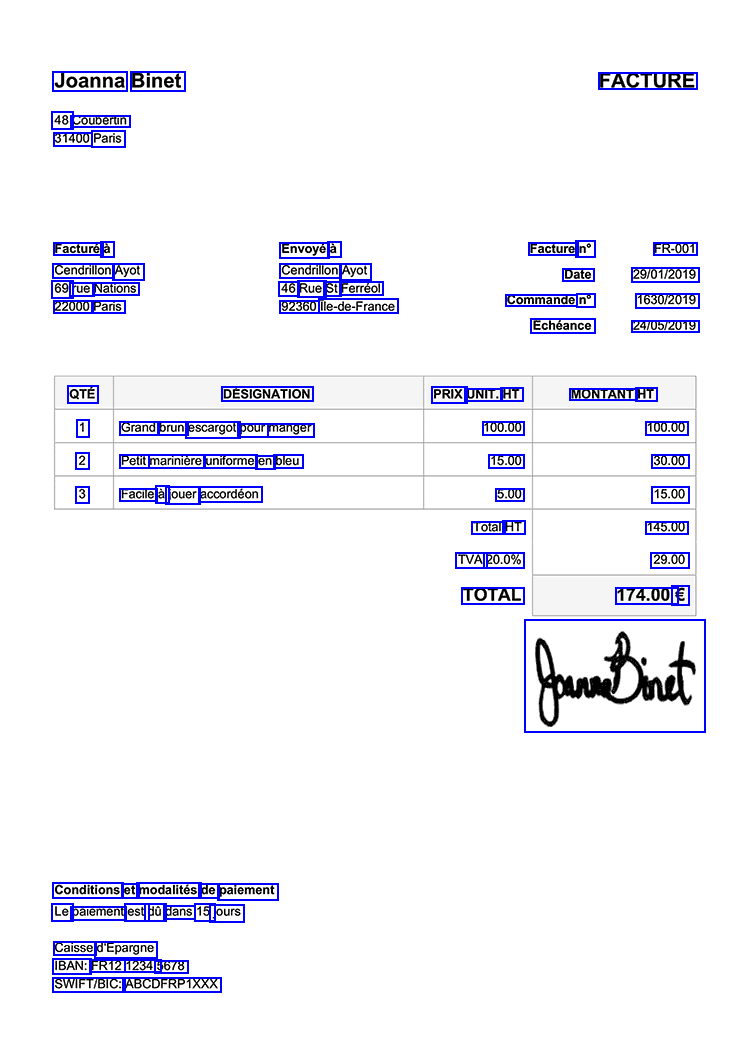

In [10]:
result_image